In [2]:
import sys
import pandas as pd
import numpy as np
import importlib.resources as pkg_resources
sys.path.append('../src')

import pyLDAvis
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

KeyboardInterrupt: 

In [ ]:
from textrove import Documents, Sentiment, Summary, DynTM, WordNetwork

In [ ]:
df_bn = pd.read_csv('../data/bank_negara_mps.csv')
print("Columns in Data: ", df_bn.columns)
print("\n\nData has {0} rows & {1} columns".format(df_bn.shape[0], df_bn.shape[1]))

Columns in Data:  Index(['Date', 'Change in OPR (%)', 'New OPR Level (%)',
       'Monetary Policy Statement', 'Year', 'Quarter'],
      dtype='object')


Data has 109 rows & 6 columns


# Exploratory Data Analysis

In [ ]:
custom_stp = ['bank', 'negara', 'monetary', 'policy', 'statement', 'malaysia', 'committee', 
'meeting', 'today', 'mpc', 'percent']

In [ ]:
doc_obj = Documents(data_frame=df_bn, stopwrd=custom_stp, text_column='Monetary Policy Statement')
df_bn_clean = doc_obj.prep_docs(return_df=True)

100%|██████████| 109/109 [00:06<00:00, 15.86it/s]


In [ ]:
df_bn_clean.head()

,Date,Change in OPR (%),New OPR Level (%),Monetary Policy Statement,Year,Quarter,Monetary Policy Statement_clean
0,6-May-21,0,1.75,"At its meeting today, the Monetary Policy Comm...",2021,Q2-2021,decide maintain overnight rate opr global econ...
1,4-Mar-21,0,1.75,"At its meeting today, the Monetary Policy Comm...",2021,Q1-2021,decide maintain overnight rate opr global econ...
2,20-Jan-21,0,1.75,"At its meeting today, the Monetary Policy Comm...",2021,Q1-2021,decide maintain overnight rate opr global econ...
3,3-Nov-20,0,1.75,"At its meeting today, the Monetary Policy Comm...",2020,Q4-2020,decide maintain overnight rate opr global econ...
4,10-Sep-20,0,1.75,"At its meeting today, the Monetary Policy Comm...",2020,Q3-2020,decide maintain overnight rate opr global econ...


In [ ]:
freq, rare = doc_obj.explore(ngram_range=(1,3), X_variable='Year')

In [ ]:
freq.to_csv('freq_phrases.csv', index=False)
rare.to_csv('rare_phrases.csv', index=False)

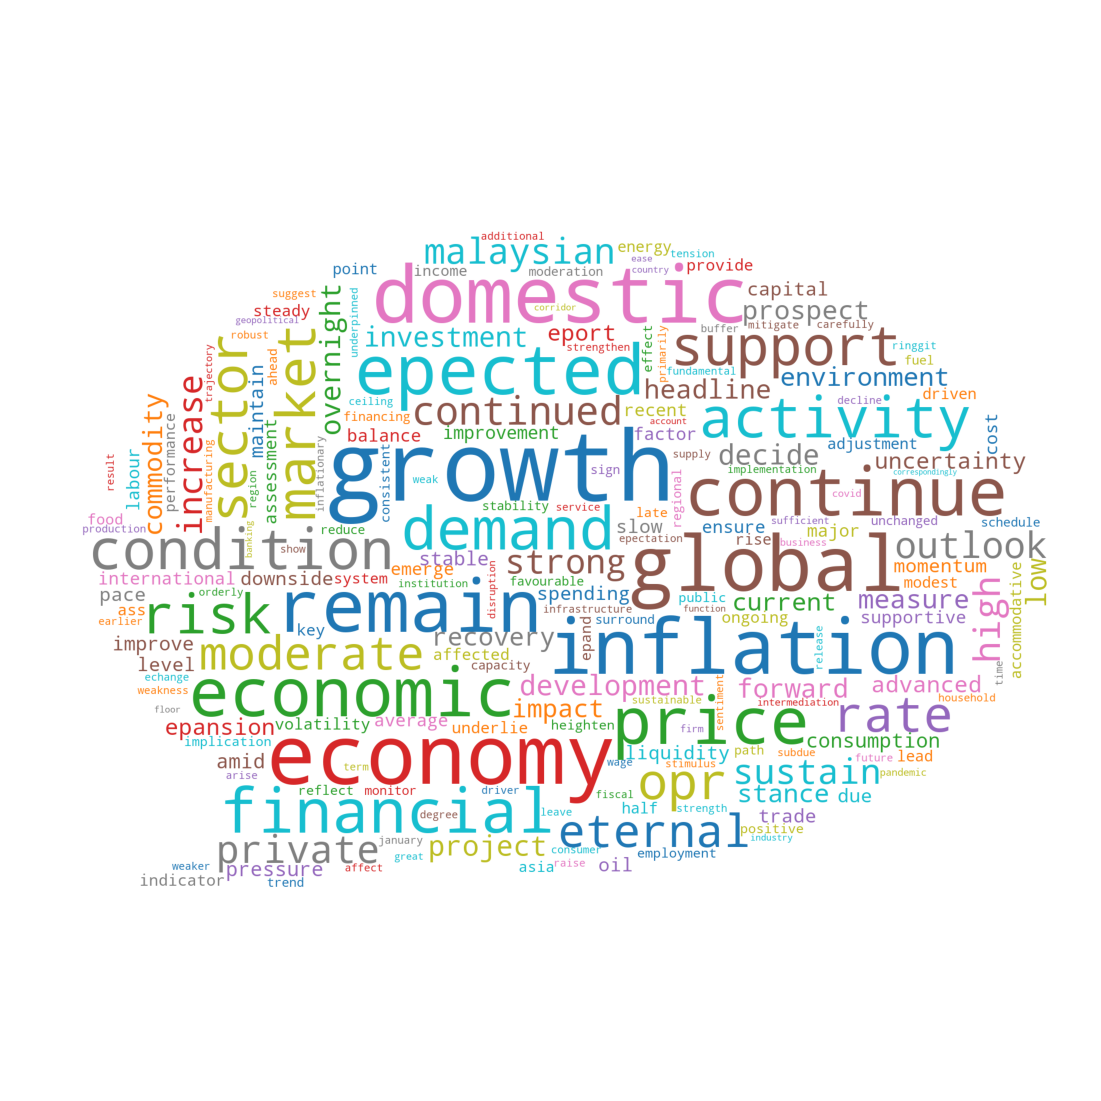

In [ ]:
doc_obj.create_wordcloud()

# Sentiment Analysis

In [ ]:
sent_obj = Sentiment(documents_object=doc_obj, method='lexical', lexicon='loughran')
sent_obj.plot_sentiment()

100%|██████████| 109/109 [00:02<00:00, 53.18it/s]


In [ ]:
sent_obj.plot_sentiment(X_variable='Year')

100%|██████████| 109/109 [00:01<00:00, 61.94it/s]


In [ ]:
sent_obj.plot_word_sentiment(X_variable='Year')

100%|██████████| 109/109 [00:01<00:00, 61.59it/s]


# Summarization and Keyword Tagging

In [ ]:
summ_obj = Summary(documents_object=doc_obj)
result = summ_obj.generate_results()

100%|██████████| 109/109 [00:04<00:00, 24.95it/s]


In [ ]:
result.head()

,Date,Change in OPR (%),New OPR Level (%),Monetary Policy Statement,Year,Quarter,Monetary Policy Statement_clean,Monetary Policy Statement_summary,Monetary Policy Statement_keyword
0,6-May-21,0,1.75,"At its meeting today, the Monetary Policy Comm...",2021,Q2-2021,decide maintain overnight rate opr global econ...,"At its meeting today, the Monetary Policy Comm...","policy, domestic, outlook remains, conditions ..."
1,4-Mar-21,0,1.75,"At its meeting today, the Monetary Policy Comm...",2021,Q1-2021,decide maintain overnight rate opr global econ...,"At its meeting today, the Monetary Policy Comm...","policy, remains, remain supportive, domestic, ..."
2,20-Jan-21,0,1.75,"At its meeting today, the Monetary Policy Comm...",2021,Q1-2021,decide maintain overnight rate opr global econ...,"At its meeting today, the Monetary Policy Comm...","policy, remain, globally, growth, economic, co..."
3,3-Nov-20,0,1.75,"At its meeting today, the Monetary Policy Comm...",2020,Q4-2020,decide maintain overnight rate opr global econ...,"At its meeting today, the Monetary Policy Comm...","remain, remains, remaining, policy, meeting, m..."
4,10-Sep-20,0,1.75,"At its meeting today, the Monetary Policy Comm...",2020,Q3-2020,decide maintain overnight rate opr global econ...,"At its meeting today, the Monetary Policy Comm...","policy, remaining, remain, uncertainty, uncert..."


In [ ]:
result.to_csv('summ.csv', index=False)

# Topic Modelling

In [ ]:
tm_obj = DynTM(documents_object=doc_obj, algo='gensim')
optim_k, optim_decay = tm_obj.suggest_num_topic(limit=7)

--- Preparing Texts for Model ---
--- Checking for best K between [2, 10] --- 

--- Simulating Model with K=2 ---
--- Simulating Model with K=3 ---
--- Simulating Model with K=4 ---
--- Simulating Model with K=5 ---
--- Simulating Model with K=6 ---
--- Simulating Model with K=7 ---
--- Simulating Model with K=8 ---
--- Simulating Model with K=9 ---
--- Simulating Model with K=10 ---
--- Calculating Stability Index ---
--- Identifying Optimal K ---


In [ ]:
tm_obj = DynTM(documents_object=doc_obj, algo='sklearn')
tm_obj.fit(num_topics=5)
print('\n')
topic_df, vis = tm_obj.evaluate()

--- Preparing Texts for Model ---

Model training complete.



Log Likelihood:  -149347.52392956047
Perplexity:  323.0123587642166


Topic-1:  ['measure' 'condition' 'outlook' 'recovery' 'activity' 'risk' 'oil'
 'financial' 'support' 'pandemic' 'covid' 'project' 'market' 'affect'
 'improvement' 'uncertainty' 'high' 'downside' 'containment' 'improve'
 'headline' 'subject' 'sector' 'amid' 'early' 'low' 'average' 'ongoing'
 'primarily' 'labour']


Topic-2:  ['strong' 'sector' 'sustain' 'trade' 'support' 'outlook' 'expansion'
 'activity' 'external' 'headline' 'level' 'private' 'current' 'high'
 'balance' 'tension' 'oil' 'investment' 'underlie' 'low' 'supportive'
 'malaysian' 'project' 'capacity' 'drive' 'positive' 'export' 'average'
 'stance' 'pressure']


Topic-3:  ['financial' 'market' 'risk' 'moderate' 'activity' 'support' 'sector'
 'private' 'liquidity' 'external' 'capital' 'prospect' 'project' 'low'
 'investment' 'development' 'amid' 'advanced' 'export' 'stable'
 'malaysian' 'conditio

In [ ]:
pyLDAvis.enable_notebook()
%matplotlib inline
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.027739 -0.012352       1        1  30.450927
2      0.024017 -0.123403       2        1  29.400437
1      0.055451 -0.070206       3        1  15.752809
4      0.136479  0.139450       4        1  13.837339
0     -0.188207  0.066511       5        1  10.558488, topic_info=          Term        Freq       Total Category  logprob  loglift
851     strong  213.000000  213.000000  Default  30.0000  30.0000
703   recovery  165.000000  165.000000  Default  29.0000  29.0000
529    measure  186.000000  186.000000  Default  28.0000  28.0000
877    sustain  178.000000  178.000000  Default  27.0000  27.0000
346  financial  524.000000  524.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
72     average   20.357971  104.537777   Topic5  -4.8983   0.6122
581    ongoing   19.663463   92.369252   Topic5  -4.9330   0.7012
506        low   22.304269  190.037267   Topic5  -4.8070   0.1058
780     sector   22.756759  384.414426   Topic5  -4.7869  -0.5786
480     labour   17.080193  104.894617   Topic5  -5.0739   0.4332

[392 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         1  0.870140    access
4         5  0.108768    access
15        2  0.983627       act
17        1  0.413424  activity
17        2  0.311763  activity
...     ...       ...       ...
969       4  0.844910   warrant
973       1  0.616076  weakness
973       2  0.198734  weakness
973       4  0.039747  weakness
973       5  0.119240  weakness

[667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

In [ ]:
pyLDAvis.disable_notebook()
%matplotlib inline

In [ ]:
tm_obj.plot_topics()

--- Predicting on the texts ---
100%|██████████| 109/109 [00:00<00:00, 132.38it/s]Topic-1:  ['financial' 'remain' 'market' 'risk' 'sector' 'support' 'activity'
 'moderate' 'continued' 'low' 'condition' 'eternal' 'malaysian' 'headline'
 'private' 'stable' 'investment' 'development' 'remains' 'environment'
 'amid' 'project' 'downside' 'prospect' 'spending' 'consumption' 'capital'
 'uncertainty' 'commodity' 'liquidity']


Topic-2:  ['condition' 'measure' 'activity' 'recovery' 'outlook' 'risk' 'oil'
 'financial' 'support' 'pandemic' 'covid' 'remain' 'project' 'improvement'
 'remains' 'market' 'high' 'improve' 'headline' 'containment' 'downside'
 'uncertainty' 'continued' 'due' 'sector' 'average' 'amid' 'subject' 'low'
 'ongoing']


Topic-3:  ['remain' 'financial' 'activity' 'sustain' 'strong' 'private' 'eternal'
 'sector' 'market' 'moderate' 'risk' 'support' 'investment' 'project'
 'increase' 'condition' 'continued' 'advanced' 'epansion' 'prospect'
 'high' 'forward' 'outlook' 'remains' 'fa

In [ ]:
xx = tm_obj.plot_topics(X_variable='Year', return_df=True)

--- Predicting on the texts ---

100%|██████████| 109/109 [00:00<00:00, 166.93it/s]
Topic-1:  ['measure' 'condition' 'outlook' 'recovery' 'activity' 'risk' 'oil'
 'financial' 'support' 'pandemic' 'covid' 'project' 'market' 'affect'
 'improvement' 'uncertainty' 'high' 'downside' 'containment' 'improve'
 'headline' 'subject' 'sector' 'amid' 'early' 'low' 'average' 'ongoing'
 'primarily' 'labour']


Topic-2:  ['strong' 'sector' 'sustain' 'trade' 'support' 'outlook' 'expansion'
 'activity' 'external' 'headline' 'level' 'private' 'current' 'high'
 'balance' 'tension' 'oil' 'investment' 'underlie' 'low' 'supportive'
 'malaysian' 'project' 'capacity' 'drive' 'positive' 'export' 'average'
 'stance' 'pressure']


Topic-3:  ['financial' 'market' 'risk' 'moderate' 'activity' 'support' 'sector'
 'private' 'liquidity' 'external' 'capital' 'prospect' 'project' 'low'
 'investment' 'development' 'amid' 'advanced' 'export' 'stable'
 'malaysian' 'condition' 'consumption' 'pace' 'environment' 'stance'
 '

In [ ]:
mytext_3 = doc_obj.processed_df.loc[doc_obj.processed_df['Year']==2004]['Monetary Policy Statement_clean'].tolist()
mytext_3 = [' '.join(mytext_3)]
mytext_4 = tm_obj.lda_vectorizer.transform(mytext_3)

In [ ]:
topic_probability_scores = tm_obj.ldamodel.transform(mytext_4)
# topic = tm_obj.topic_map.T.iloc[np.argmax(topic_probability_scores), 1:10]

In [ ]:
topic_probability_scores

array([[4.53216575e-04, 9.98185968e-01, 4.52140679e-04, 4.55303487e-04,
        4.53370881e-04]])

In [ ]:
np.argmax(topic_probability_scores, axis=0)

array([0, 4, 0, 0, 2], dtype=int64)

In [ ]:
top_keyword_locs = (-mytext_4.todense()).argsort()[0,0:30]
top_keyword_locs

matrix([[780, 870, 317, 851, 403, 656, 506, 162, 471, 325, 768,  17, 931,
         198, 513, 645, 665, 435, 340, 107, 529, 515, 426, 424, 591, 140,
         414, 472, 877, 146]], dtype=int64)

In [ ]:
keywords = np.array(tm_obj.lda_vectorizer.get_feature_names())
keywords.take(top_keyword_locs)

array([['sector', 'support', 'expansion', 'strong', 'high', 'private',
        'low', 'consumer', 'investment', 'export', 'rise', 'activity',
        'unchanged', 'current', 'maintain', 'pressure', 'productivity',
        'index', 'favourable', 'capacity', 'measure', 'malaysian',
        'improvement', 'improve', 'outlook', 'competition', 'impact',
        'investor', 'sustain', 'condition']], dtype='<U20')

In [ ]:
top_keyword_locs2 = (-mytext_4.todense()).argsort()[0,0:5]
keywords.take(top_keyword_locs2)[0].tolist()

['sector', 'support', 'expansion', 'strong', 'high']

In [ ]:
pp = [word for word in keywords.take(top_keyword_locs)[0] if word in keywords.take(top_keyword_locs2)[0].tolist()]
pp

['sector', 'support', 'expansion', 'strong', 'high']

In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.FloatSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

FloatSlider(value=7.0, continuous_update=False, description='Test:', max=10.0, readout_format='d', step=1.0)

In [ ]:
button = widgets.FloatSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.value

FloatSlider(value=7.0, description='Test:', max=10.0, readout_format='d', step=1.0)

Output()

7.0

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:

    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
docs = ['this this this book',
        'this cat good',
        'cat good shit']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
# X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence (see below)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
g = sp.diags(1./Xc.diagonal())
# Xc_norm = g * Xc # normalized co-occurence matrix
# Xc_norm.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format

[[1.  0.  0.  0.  3. ]
 [0.  1.  1.  0.5 0.5]
 [0.  1.  1.  0.5 0.5]
 [0.  1.  1.  1.  0. ]
 [0.3 0.1 0.1 0.  1. ]]


In [ ]:
count_model.vocabulary_

{'this': 4, 'book': 0, 'cat': 1, 'good': 2, 'shit': 3}

In [ ]:
Xc_norm

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
text = "to be or not to be"
tokens = nltk.word_tokenize(text)
bigrm = list(nltk.bigrams(tokens))

In [ ]:
bigrm

[('to', 'be'), ('be', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be')]

In [ ]:
import itertools
import collections
import math

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*bigrm))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrm)

In [ ]:
bigram_counts

Counter({('to', 'be'): 2, ('be', 'or'): 1, ('or', 'not'): 1, ('not', 'to'): 1})

In [ ]:
# for word1 in df.columns.tolist():
#     new_cols = df.columns.tolist()
#     new_cols.remove(word1)
#     for word2 in new_cols:
#         n11= len(df.loc[(df[word1]>0) & (df[word2]>0)])
#         n10= len(df.loc[(df[word1]>0) & (df[word2]<=0)])
#         n01= len(df.loc[(df[word1]<=0) & (df[word2]>0)])
#         n00= len(df.loc[(df[word1]<=0) & (df[word2]<=0)])
#         phi = ((n11*n00) - (n10*n01)) / math.sqrt((n11+n10)*(n01+n00)*(n11+n01)*(n10+n00))
#         print(word1 + "---" + word2 + "---" + str(phi))

In [ ]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=100.0)
nx_graph.add_edge(20, 15, weight=0.0)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network(height='500px', width='1100px', notebook=True)
nt.repulsion()
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.toggle_physics(True)
nt.toggle_stabilization(True)
nt.show_buttons(filter_=['physics'])
nt.show('ss.html')

In [4]:
import spacy

nlp = spacy.load("en_core_web_trf")
nlp._path


doc = nlp("Apple is looking at buying U.K. startup for $1 billion".lower())

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


apple 0 5 ORG
u.k. 27 31 GPE
$1 billion 44 54 MONEY


In [4]:
dir(ent)

['_',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_fix_dep_copy',
 '_vector',
 '_vector_norm',
 'as_doc',
 'char_span',
 'conjuncts',
 'doc',
 'end',
 'end_char',
 'ent_id',
 'ent_id_',
 'ents',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'kb_id',
 'kb_id_',
 'label',
 'label_',
 'lefts',
 'lemma_',
 'n_lefts',
 'n_rights',
 'noun_chunks',
 'orth_',
 'remove_extension',
 'rights',
 'root',
 'sent',
 'sentiment',
 'set_extension',
 'similarity',
 'start',
 'start_char',
 'subtree',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'vector',
 'vector_norm',
 'vocab']

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...


True